/tmp/ipykernel_568394/3319029100.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))


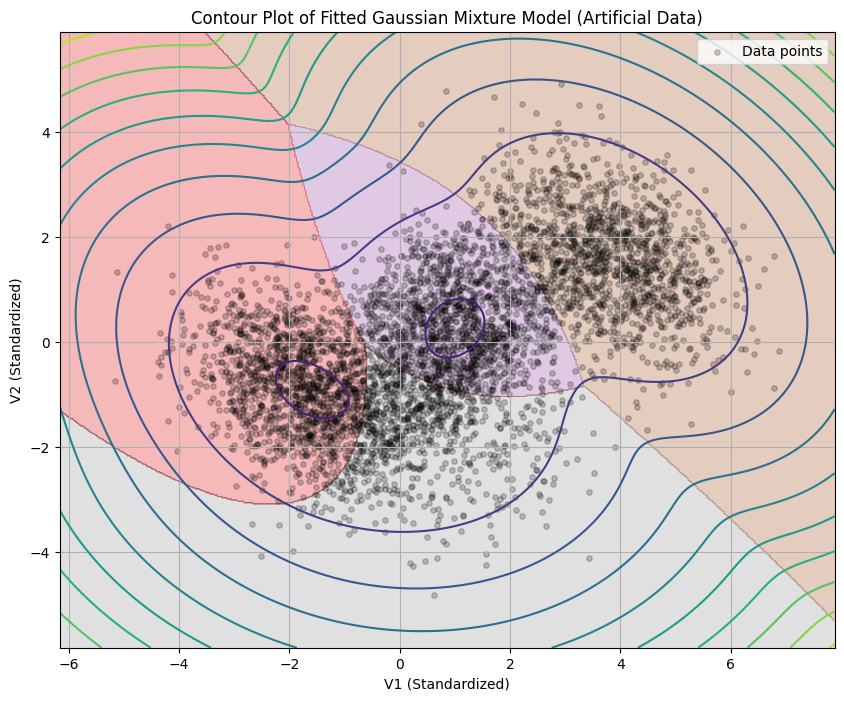

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv')
data2024b_values = data2024b[['V1', 'V2']].values

# Fit the GMM with 4 components (best model from previous analysis)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(data2024b_values)

# Create a grid for plotting
x = np.linspace(data2024b_values[:, 0].min() - 1, data2024b_values[:, 0].max() + 1, 500)
y = np.linspace(data2024b_values[:, 1].min() - 1, data2024b_values[:, 1].max() + 1, 500)
X, Y = np.meshgrid(x, y)
XY = np.array([X.ravel(), Y.ravel()]).T

# Get the model's predicted probabilities for the grid points
Z = -gmm.score_samples(XY)  # Negative log-likelihood
Z = Z.reshape(X.shape)

# Plot the contour of the mixture model
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Plot the decision boundaries (cluster assignments) based on the GMM model
labels = gmm.predict(XY)
plt.contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))

# Plot the artificial data points
plt.scatter(data2024b_values[:, 0], data2024b_values[:, 1], c='black', s=15, label='Data points', alpha=0.2)

# Final plot adjustments
plt.title('Contour Plot of Fitted Gaussian Mixture Model (Artificial Data)')
plt.xlabel('V1 (Standardized)')
plt.ylabel('V2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_568394/678989063.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  contour_filled = plt.contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))


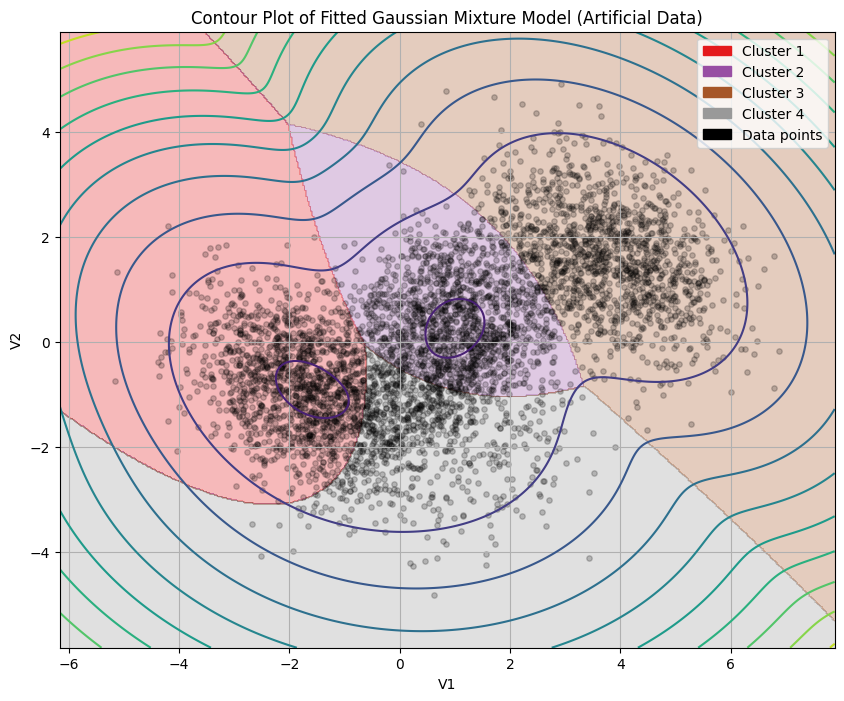

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import matplotlib.patches as mpatches

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv')
data2024b_values = data2024b[['V1', 'V2']].values

# Fit the GMM with 4 components (best model from previous analysis)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(data2024b_values)

# Create a grid for plotting
x = np.linspace(data2024b_values[:, 0].min() - 1, data2024b_values[:, 0].max() + 1, 500)
y = np.linspace(data2024b_values[:, 1].min() - 1, data2024b_values[:, 1].max() + 1, 500)
X, Y = np.meshgrid(x, y)
XY = np.array([X.ravel(), Y.ravel()]).T

# Get the model's predicted probabilities for the grid points
Z = -gmm.score_samples(XY)  # Negative log-likelihood
Z = Z.reshape(X.shape)

# Plot the contour of the mixture model
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Plot the decision boundaries (cluster assignments) based on the GMM model
labels = gmm.predict(XY)
contour_filled = plt.contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))

# Plot the artificial data points
plt.scatter(data2024b_values[:, 0], data2024b_values[:, 1], c='black', s=15, label='Data points', alpha=0.2)

# Create legend handles for each cluster color
handles = []
for i in range(4):
    handles.append(mpatches.Patch(color=contour_filled.cmap(contour_filled.norm(i)), label=f'Cluster {i + 1}'))

# Final plot adjustments
plt.title('Contour Plot of Fitted Gaussian Mixture Model (Artificial Data)')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(handles=handles + [mpatches.Patch(color='black', label='Data points')])
plt.grid(True)
plt.show()


/tmp/ipykernel_470249/3147892182.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  contour_filled = axes[i].contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))
/tmp/ipykernel_470249/3147892182.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  contour_filled = axes[i].contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))
/tmp/ipykernel_470249/3147892182.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


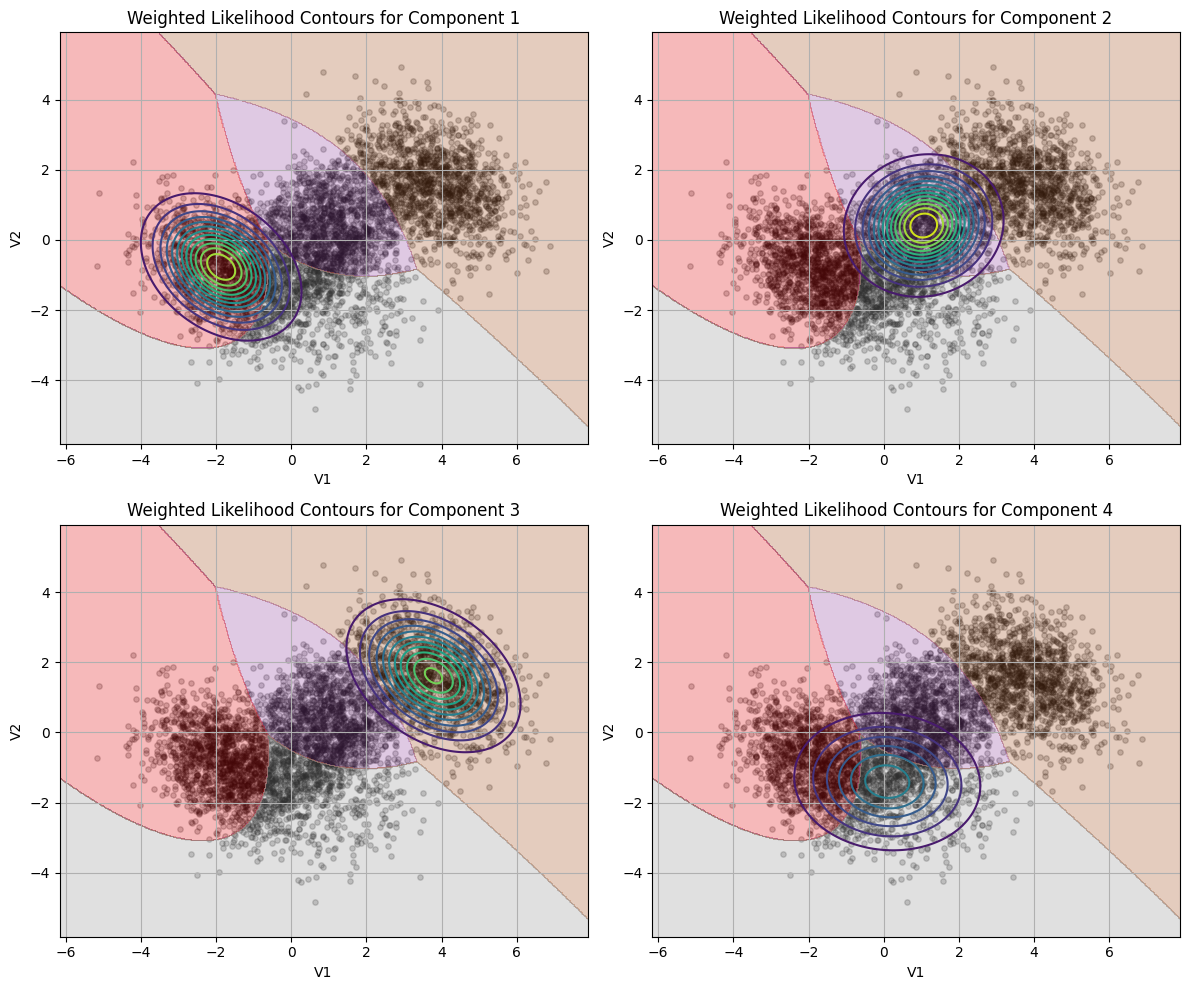

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib import cm
import matplotlib.patches as mpatches
from scipy.stats import multivariate_normal

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv')
data2024b_values = data2024b[['V1', 'V2']].values

# Normalize the dataset
data2024b_std = data2024b_values

# Fit the GMM with 4 components (best model from previous analysis)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(data2024b_std)

# Create a grid for plotting
x = np.linspace(data2024b_std[:, 0].min() - 1, data2024b_std[:, 0].max() + 1, 500)
y = np.linspace(data2024b_std[:, 1].min() - 1, data2024b_std[:, 1].max() + 1, 500)
X, Y = np.meshgrid(x, y)
XY = np.array([X.ravel(), Y.ravel()]).T

# Initialize an array to store the weighted likelihoods for each component
weighted_likelihoods = np.zeros((XY.shape[0], gmm.n_components))

# Compute the weighted likelihood for each component
for i in range(gmm.n_components):
    # Calculate the likelihood for each point in the grid
    likelihood = multivariate_normal.pdf(XY, mean=gmm.means_[i], cov=gmm.covariances_[i])
    # Weight the likelihood by the component weight
    weighted_likelihoods[:, i] = gmm.weights_[i] * likelihood

# Reshape for contour plotting
weighted_likelihoods = weighted_likelihoods.reshape(X.shape + (gmm.n_components,))

# Define contour levels
levels = np.linspace(0, np.max(weighted_likelihoods), 15)

# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Create contours for each component
for i in range(gmm.n_components):
    Z_component = weighted_likelihoods[:, :, i]  # Get the weighted likelihood for the current component
    axes[i].contour(X, Y, Z_component, levels=levels, cmap='viridis')
    
    # Plot the artificial data points
    axes[i].scatter(data2024b_std[:, 0], data2024b_std[:, 1], c='black', s=15, label='Data points', alpha=0.2)

    # Final plot adjustments
    axes[i].set_title(f'Weighted Likelihood Contours for Component {i + 1}')
    axes[i].set_xlabel('V1')
    axes[i].set_ylabel('V2')
    axes[i].grid(True)
    # Plot the decision boundaries (cluster assignments) based on the GMM model
    labels = gmm.predict(XY)
    contour_filled = axes[i].contourf(X, Y, labels.reshape(X.shape), alpha=0.3, cmap=cm.get_cmap('Set1', 4))

# Adjust layout
plt.tight_layout()
plt.show()
